# Data Story for Capstone 1 project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import datetime
import seaborn as sns

In [2]:
# read in the data set, extract all the ticker symbols into a list
df = pd.read_csv('./data/all_cefs_clean.csv')
tickers = sorted(list(set(df.ticker)))
df.head()

,ticker,Date,Close,Adj_Close,NAV,Adj_NAV,Volume
0,ACP,2011-01-27,20.00,8.93,19.06,9.04,335449
1,ACP,2011-01-28,20.10,8.98,19.05,9.03,15700
2,ACP,2011-01-31,20.20,9.02,18.99,9.01,7400
3,ACP,2011-02-01,20.10,8.98,19.00,9.01,10150
4,ACP,2011-02-02,20.05,8.95,19.02,9.02,12050


In [3]:
# set index to ticker and set date column to type datetime. check types
df1 = df.set_index(['ticker'])
df1.Date = pd.to_datetime(df1.Date)
df1.dtypes

Date         datetime64[ns]
Close               float64
Adj_Close           float64
NAV                 float64
Adj_NAV             float64
Volume                int64
dtype: object

In [4]:
df1.head()

,Date,Close,Adj_Close,NAV,Adj_NAV,Volume
ticker,,,,,,
ACP,2011-01-27,20.00,8.93,19.06,9.04,335449
ACP,2011-01-28,20.10,8.98,19.05,9.03,15700
ACP,2011-01-31,20.20,9.02,18.99,9.01,7400
ACP,2011-02-01,20.10,8.98,19.00,9.01,10150
ACP,2011-02-02,20.05,8.95,19.02,9.02,12050


In [5]:
# read in other fundamental fund data
fdf = pd.read_csv('./data/cef_fundem_clean.csv')
fdf.head()

,Ticker,Category,Mkt_Cap,Act_Exp,Net_Exp,Dist_Freq
0,ACP,Fixed Income,1.527958e+05,0.016755,0.023619,12.0
1,ACV,Equity US,2.230959e+05,0.010566,0.022416,12.0
2,ADX,Equity US,1.430408e+06,0.005337,0.005337,4.0
3,AEF,Equity Foreign,6.719044e+04,0.018305,0.020418,2.0
4,AFB,Municipal Bonds,3.695975e+05,0.006044,0.010214,12.0


In [6]:
fdf1 = fdf.set_index('Ticker')

In [7]:
# Some interesting stats
mcsum = fdf1['Mkt_Cap'].sum()
print(f'Total number of funds:         {len(fdf1):16}')
print(f'Total market cap of all funds: ${fdf1.Mkt_Cap.sum()*1000:15,.0f}')
print(f'Mean market cap:               ${fdf1.Mkt_Cap.mean()*1000:15,.0f}')
print(f'Median market cap:             ${fdf1.Mkt_Cap.median()*1000:15,.0f}')
print(f'Mean net expense ratio:        {fdf1.Net_Exp.mean():16.4}')
print(f'Median net expense ratio:      {fdf1.Net_Exp.median():16.4}')

Total number of funds:                      496
Total market cap of all funds: $215,456,271,965
Mean market cap:               $    434,387,645
Median market cap:             $    260,859,095
Mean net expense ratio:                 0.01453
Median net expense ratio:               0.01389


In [8]:
# mean market cap and net expense ratio by category
fdf1.groupby('Category').mean()[['Mkt_Cap', 'Net_Exp']]

,Mkt_Cap,Net_Exp
Category,,
Equity Foreign,2.434558e+05,0.014672
Equity US,5.143330e+05,0.016565
Fixed Income,4.392116e+05,0.014841
Municipal Bonds,3.735391e+05,0.012398
Precious Metals,1.432886e+06,0.005725


In [9]:
# function to compute compound annual growth rate
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1


In [10]:
# compute total return for each fund
tot_ret = []
for t in tickers:
    tot_ret.append((df1.loc[t].iloc[-1].Adj_Close / df1.loc[t].iloc[0].Adj_Close - 1) * 100)


In [11]:
# compute annualized return
ann_ret = []
for t in tickers:
    diff = df1.loc[t].iloc[-1].Date - df1.loc[t].iloc[0].Date
    ann_ret.append(CAGR(df1.loc[t].iloc[0].Adj_Close, df1.loc[t].iloc[-1].Adj_Close, diff.days/365.25) * 100)

Histogram of annualized return of all the funds.

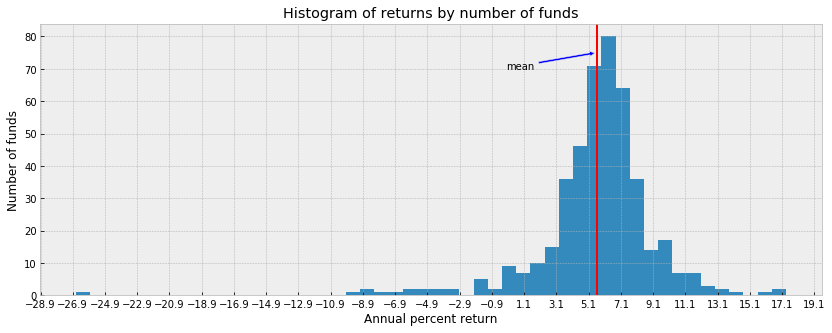

In [12]:
mpl.style.use('bmh')
fig, ax = plt.subplots(figsize=(14,5))
ax.hist(ann_ret, bins=50)
ax.axvline(np.mean(ann_ret), color='r')
ax.annotate('mean', xy=(np.mean(ann_ret), 75), xytext=(0, 70), arrowprops=dict(arrowstyle='simple'))
ax.set_xlabel('Annual percent return')
ax.set_ylabel('Number of funds')
ax.set_title('Histogram of returns by number of funds')
ax.axis(option='tight')
start, end = ax.get_xlim()
_ = ax.set_xticks(np.arange(round(start,1), round(end,1), 2))
# ax.set_xticklabels(list(np.arange(round(start,1), round(end,1), 3)), rotation=60)


In [13]:
# combine fundamental dataframe with prices

In [14]:
df2 = df1.merge(fdf1, how='left', left_index=True, right_index=True)
df2.rename_axis('ticker', inplace=True)

In [15]:
# make sure data is sorted correctly
# df3 = df2.sort_values(by=['ticker', 'Date'], ascending=[True, False])
df2.index.unique()

Index(['ACP', 'ADX', 'AEF', 'AFB', 'AFT', 'AGD', 'AIF', 'AKP', 'AOD', 'APF',
       ...
       'VMO', 'VPV', 'VTA', 'VTN', 'VVR', 'WEA', 'WIA', 'WIW', 'ZF', 'ZTR'],
      dtype='object', name='ticker', length=449)

In [16]:
cats = np.array(df2.Category.unique())
cats

array(['Fixed Income', 'Equity US', 'Equity Foreign', 'Municipal Bonds',
       'Precious Metals'], dtype=object)

In [17]:
cat_ret = []
for cat in cats:
    df4 = df2[df2.Category == cat]
    ann_ret = []
    for t in df4.index.unique():
        diff = df4.loc[t].iloc[-1].Date - df4.loc[t].iloc[0].Date
        ann_ret.append(CAGR(df4.loc[t].iloc[0].Adj_Close, df4.loc[t].iloc[-1].Adj_Close, diff.days/365.25) * 100)
    cat_ret.append((np.mean(ann_ret)))
        

Text(0.5, 1.0, 'Return by Category')

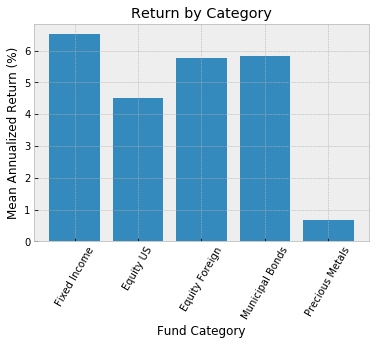

In [18]:
plt.bar(cats, cat_ret)
plt.xticks(rotation=60)
plt.xlabel('Fund Category')
plt.ylabel('Mean Annualized Return (%)')
plt.title('Return by Category')

In [19]:
# calculate discount to net asset value
# a negative number indicates a discount
# a positive number indicates a premium
df2['Discount'] = (df2.Close - df2.NAV) / df2.NAV

In [20]:
df2.sort_values(by=['ticker', 'Date'], inplace=True)
df2.set_index(['Date'], append=True, inplace=True)

In [21]:
# calculate 1, 3 , 5, and 10 year rolling returns
# shift the data back so that the returns are going forward
ret_1 = []
ret_3 = []
ret_5 = []
ret_10 = []
for t in tickers:
    ret_1.extend(df2.loc[t].Adj_Close.pct_change(252).shift(-252))
    ret_3.extend(df2.loc[t].Adj_Close.pct_change(252*3).shift(-252*3))
    ret_5.extend(df2.loc[t].Adj_Close.pct_change(252*5).shift(-252*5))
    ret_10.extend(df2.loc[t].Adj_Close.pct_change(252*10).shift(-252*10))
df2['ret_1'] = ret_1
df2['ret_3'] = ret_3
df2['ret_5'] = ret_5
df2['ret_10'] = ret_10
df2.head()

Close  Adj_Close    NAV  Adj_NAV  Volume      Category  \
ticker Date                                                                 
ACP    2011-01-27  20.00       8.93  19.06     9.04  335449  Fixed Income   
       2011-01-28  20.10       8.98  19.05     9.03   15700  Fixed Income   
       2011-01-31  20.20       9.02  18.99     9.01    7400  Fixed Income   
       2011-02-01  20.10       8.98  19.00     9.01   10150  Fixed Income   
       2011-02-02  20.05       8.95  19.02     9.02   12050  Fixed Income   

                      Mkt_Cap   Act_Exp   Net_Exp  Dist_Freq  Discount  \
ticker Date                                                              
ACP    2011-01-27  152795.838  0.016755  0.023619       12.0  0.049318   
       2011-01-28  152795.838  0.016755  0.023619       12.0  0.055118   
       2011-01-31  152795.838  0.016755  0.023619       12.0  0.063718   
       2011-02-01  152795.838  0.016755  0.023619       12.0  0.057895   
       2011-02-02  152795.838  0.016755  0.023619       12.0  0.054154   

                      ret_1     ret_3     ret_5  ret_10  
ticker Date                                              
ACP    2011-01-27 -0.067189  0.120941 -0.183651     NaN  
       2011-01-28 -0.060134  0.100223 -0.178174     NaN  
       2011-01-31 -0.048780  0.099778 -0.185144     NaN  
       2011-02-01 -0.041203  0.097996 -0.190423     NaN  
       2011-02-02 -0.046927  0.110615 -0.185475     NaN

Let's see how discount relates forward returns. Below are scatter plots of the discount versus the 1,3,5, and 10 year returns ending in March of 2019, along with the correlation coefficients for the last period and all periods.

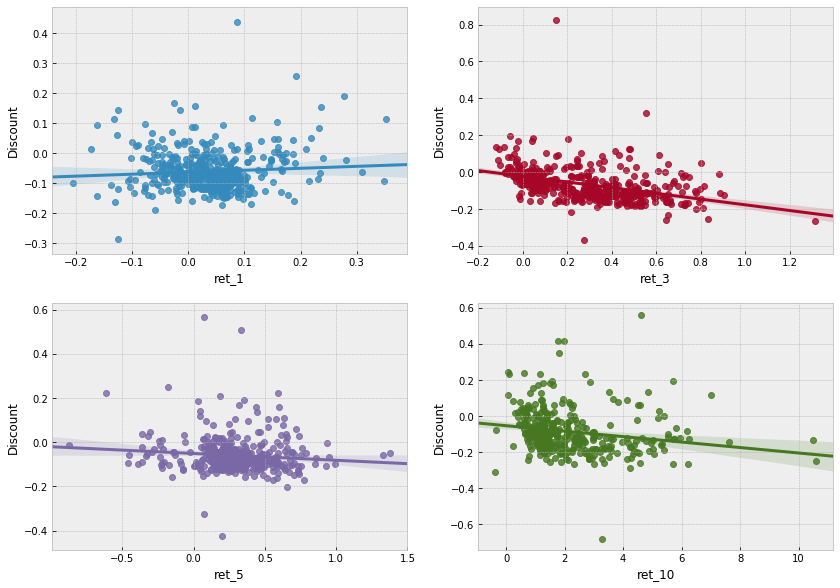

In [22]:
f, axes = plt.subplots(2,2, figsize=[14,10])
sns.regplot(x='ret_1', y='Discount', data=df2.loc[(slice(None), '2018-03-01'),], ax=axes[0,0])
sns.regplot(x='ret_3', y='Discount', data=df2.loc[(slice(None), '2016-03-01'),], ax=axes[0,1])
sns.regplot(x='ret_5', y='Discount', data=df2.loc[(slice(None), '2014-02-28'),], ax=axes[1,0])
sns.regplot(x='ret_10', y='Discount', data=df2.loc[(slice(None), '2009-02-27'),], ax=axes[1,1])
plt.show()

In [23]:
cc1yr = df2.loc[(slice(None), '2018-03-01'),][['ret_1', 'Discount']].corr().loc['ret_1', 'Discount']
cc1yr_all = df2[['ret_1', 'Discount']].corr().loc['ret_1', 'Discount']
cc3yr = df2.loc[(slice(None), '2016-03-01'),][['ret_3', 'Discount']].corr().loc['ret_3', 'Discount']
cc3yr_all = df2[['ret_3', 'Discount']].corr().loc['ret_3', 'Discount']
cc5yr = df2.loc[(slice(None), '2014-02-28'),][['ret_5', 'Discount']].corr().loc['ret_5', 'Discount']
cc5yr_all = df2[['ret_5', 'Discount']].corr().loc['ret_5', 'Discount']
cc10yr = df2.loc[(slice(None), '2009-02-27'),][['ret_10', 'Discount']].corr().loc['ret_10', 'Discount']
cc10yr_all = df2[['ret_10', 'Discount']].corr().loc['ret_10', 'Discount']

In [24]:
print('Pearson Correlation Coefficient for Discounts versus Returns')
print('1 year return for the latest period:  ', cc1yr)
print('1 year return for all periods:       ', cc1yr_all)
print('3 year return for the latest period: ', cc3yr)
print('3 year return for all periods:       ', cc3yr_all)
print('5 year return for the latest period: ', cc5yr)
print('5 year return for all periods:       ', cc5yr_all)
print('10 year return for the latest period:', cc10yr)
print('10 year return for all periods:      ', cc10yr_all)

Pearson Correlation Coefficient for Discounts versus Returns
1 year return for the latest period:   0.07343735113742943
1 year return for all periods:        -0.18918149648722143
3 year return for the latest period:  -0.40388747184922424
3 year return for all periods:        -0.2402691330135022
5 year return for the latest period:  -0.09937868697498481
5 year return for all periods:        -0.2962788682414315
10 year return for the latest period: -0.19149925999291662
10 year return for all periods:       -0.3171508873314888


This initial data exploration gives insights into what we can try to answer. It appears the discount rate is indeed negatively correlated with future returns, though not strongly. Can we make predictions using the discount rate? What about the net expense ratio? We also see that returns vary by category too, can we use that? Also, the above correlations were for all funds. From an individual fund basis, I think the corellation will be much stronger. We can explore that too. 

In [27]:
df2.to_csv('./data/cefs_all.csv')